# Sleep Health - Analysis 

The Bar charts show that Engineers have the best sleep (the average sleep duration and average quality of sleep is highest for Engineers). The Pie-chart shows that about 90% of Engineers don't have Sleep disorders. 

According to the Bar charts, Sales Representatives, Scientist and Salesperson have lower average sleep duration and average sleep quality. But there is not enough samples for Sales Representatives and Scientist to make any conclusion. So moving on to the Salesperson category, the Pie-chart for sleep disorder among Salesperson shows that about 90% of them have Insomnia.

#### Conclusion:

According to the dataset used, Engineers have best sleep, Salespersons have the lowest.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scipy.stats as st
from sklearn import linear_model

In [3]:
# Read the sleep health data from csv file and load it in a dataframe.
sleep_health = pd.read_csv("data\Sleep_health_and_lifestyle_dataset.csv")
sleep_health


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
# List of occupation and count
sleep_health['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [5]:
# Calculate average Sleep Duration for each occupation 
sleep_health_sleepduration = sleep_health.groupby(['Occupation'])['Sleep Duration'].mean()

# Converting the groupby object to a DataFrame
sleep_health_sleepduration_df = pd.DataFrame(sleep_health_sleepduration)

# Sorting the DataFrame in descending order of Sleep Duration
sleep_health_sleepduration_df.sort_values(['Sleep Duration'], ascending= False)

,Sleep Duration
Occupation,
Engineer,7.987302
Lawyer,7.410638
Accountant,7.113514
Nurse,7.063014
Doctor,6.970423
Manager,6.900000
Software Engineer,6.750000
Teacher,6.690000
Salesperson,6.403125


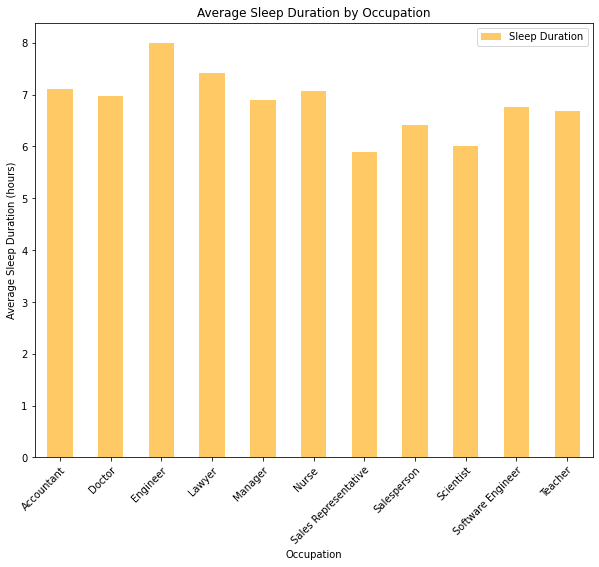

In [6]:
#  Plot Bar graph for the average Sleep Duration for each occupation
sleep_health_sleepduration_df.plot(kind = "bar",figsize= (10,8), color = "orange", alpha = 0.6)

# Set title, Y-label, X-label rotation
plt.title("Average Sleep Duration by Occupation")
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation = 45, rotation_mode="anchor", ha="right", wrap=True)

plt.show()


In [7]:
#  Calculate the average Quality of Sleep for each occupation
sleep_health_sleepquality = sleep_health.groupby(['Occupation'])['Quality of Sleep'].mean()
sleep_health_sleepquality_df = pd.DataFrame(sleep_health_sleepquality)
sleep_health_sleepquality_df.sort_values(['Quality of Sleep'], ascending = False)

,Quality of Sleep
Occupation,
Engineer,8.412698
Lawyer,7.893617
Accountant,7.891892
Nurse,7.369863
Manager,7.000000
Teacher,6.975000
Doctor,6.647887
Software Engineer,6.500000
Salesperson,6.000000


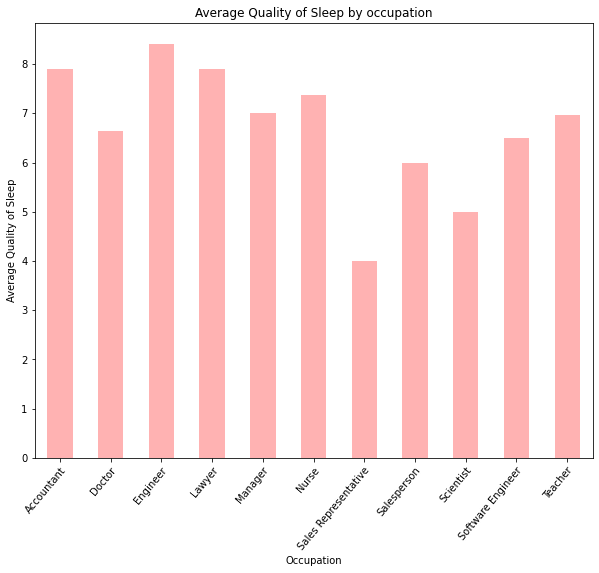

In [8]:
# Plot Bar graph for the average Quality of Slep for each occupation
sleep_health_sleepquality.plot(kind = "bar",figsize = (10,8), color = "red",alpha = 0.3,
                               title = "Average Quality of Sleep by occupation")

# Set Y-label, X-label rotation
plt.ylabel ("Average Quality of Sleep")
plt.xticks(rotation = 50, rotation_mode="anchor", ha="right",  wrap = True)

# 
plt.show()

In [9]:
# Engineer - Sleep Disorder distribution
sleep_health_disorder_Eng = sleep_health.loc[sleep_health['Occupation'] == 'Engineer'].groupby(['Sleep Disorder'])['Sleep Disorder'].count()
print(f"Sleep Disorder distribution for Engineer:\n {sleep_health_disorder_Eng.head()}")

Sleep Disorder distribution for Engineer:
 Sleep Disorder
Insomnia        5
None           57
Sleep Apnea     1
Name: Sleep Disorder, dtype: int64


In [10]:
# Sales Representative - Sleep Disorder distribution
sleep_health_disorder_SRep = sleep_health.loc[sleep_health['Occupation'] == 'Sales Representative'].groupby(['Sleep Disorder'])['Sleep Disorder'].count()
print(f"Sleep Disorder distribution for Sales Representative:\n {sleep_health_disorder_SRep.head()}")

# Scientist - Sleep Disorder distribution
sleep_health_disorder_Scientist = sleep_health.loc[sleep_health['Occupation'] == 'Scientist'].groupby(['Sleep Disorder'])['Sleep Disorder'].count()
print(f"\nSleep Disorder distribution for Scientist:\n {sleep_health_disorder_Scientist.head()}")

# Salesperson - Sleep Disorder distribution
sleep_health_disorder_Salesperson = sleep_health.loc[sleep_health['Occupation'] == 'Salesperson'].groupby(['Sleep Disorder'])['Sleep Disorder'].count()
print(f"\nSleep Disorder distribution for Salesperson:\n {sleep_health_disorder_Salesperson.head()}")

Sleep Disorder distribution for Sales Representative:
 Sleep Disorder
Sleep Apnea    2
Name: Sleep Disorder, dtype: int64

Sleep Disorder distribution for Scientist:
 Sleep Disorder
None           2
Sleep Apnea    2
Name: Sleep Disorder, dtype: int64

Sleep Disorder distribution for Salesperson:
 Sleep Disorder
Insomnia       29
None            2
Sleep Apnea     1
Name: Sleep Disorder, dtype: int64


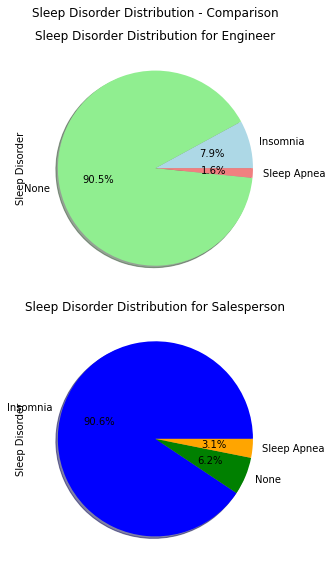

In [11]:
# Sub plots for Sleep Disorder Distribution - Engineer, Salesperson
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (20,20))
fig.suptitle('Sleep Disorder Distribution - Comparison')

# Set colors for the Pie chart
color_list1 = ['lightblue','lightgreen','lightcoral']
color_list2 = ["blue","green","orange"]

# Set the Pie chart attributes
sleep_health_disorder_Eng.plot(ax = ax1,kind = "pie",colors = color_list1, shadow = True,autopct = "%1.1f%%", 
                                figsize = (8,8), title = "Sleep Disorder Distribution for Engineer")
sleep_health_disorder_Salesperson.plot(ax = ax2,kind = "pie", figsize=(8,8),autopct = "%1.1f%%",colors = color_list2,
                                        title = "Sleep Disorder Distribution for Salesperson",shadow = True)

# Set figure background color and fitted layout
fig.set_facecolor("white")
fig.tight_layout()

plt.show()

### Analysis of Physical Activity Level Vs Sleep Duration and Physical Activity Level Vs Sleep Quality
For both Physical Activity Level Vs Sleep Duration and Physical Activity Level vs Sleep Quality, positive r-value shows that there is positive correlation between them. But the r-values (0.21 and 0.19) are close to 0, so the correlation is very weak. But for both the cases, the pvalue < 0.05 means Physical Activity Level has a significant impact on Sleep Duration and Sleep Quality respectively. So there is no clear conclusion.

Physical Activity Level Vs Sleep duration: rvalue is 0.21. pvalue is 3.4666184358494043e-05
Physical Activity Level Vs Quality of Sleep: rvalue is 0.19. pvalue is 0.00017454895247839502


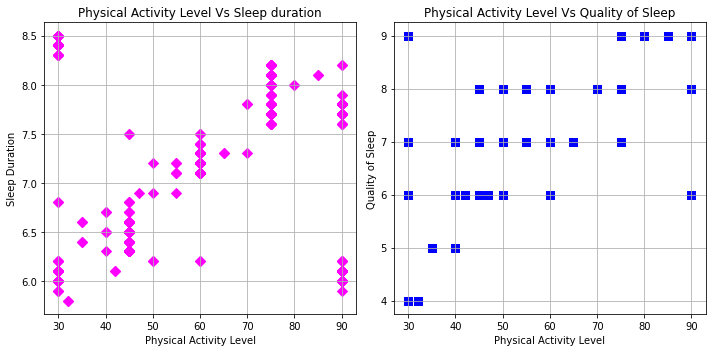

In [12]:
# Subplots for Physical activity Level vs Sleep duration and Sleep quality
fig_ph, (ax1_ph,ax2_ph) = plt.subplots(1,2,figsize = (10,5))

# Scatter plot - Physical Activity Vs Sleep duration
sleep_health.plot(ax = ax1_ph,kind = "scatter", marker = "D", s = 50, grid = True, color = "magenta", 
                  x = "Physical Activity Level", y = "Sleep Duration", title = "Physical Activity Level Vs Sleep duration")

# Calculate Linear Regression 
slope,intercept,rvalue,pvalue,stder = st.linregress(sleep_health["Physical Activity Level"],sleep_health["Sleep Duration"])
print(f"Physical Activity Level Vs Sleep duration: rvalue is {round(rvalue,2)}. pvalue is {pvalue}")


# Scatter Plot Physical Activity Vs Quality of Sleep
sleep_health.plot(ax = ax2_ph,kind = "scatter", x = 'Physical Activity Level', y= 'Quality of Sleep',grid =True,
                  marker = "s", s=50, color = "blue",  title = "Physical Activity Level Vs Quality of Sleep")

# Calculate the linear regression 
slope_q, intercept_q, rvalue_q, pvalue_q,stderr_q = st.linregress(sleep_health['Physical Activity Level'], 
                                                                  sleep_health['Quality of Sleep'])
print(f"Physical Activity Level Vs Quality of Sleep: rvalue is {round(rvalue_q,2)}. pvalue is {pvalue_q}")

fig_ph.tight_layout()
plt.show()


### Further Analysis with multiple independent variables

Physical Activity level combined with Sleep Duration Vs Quality of Sleep has a high R² value(0.78) and so has a strong positive correlation. 
Similarly Physical Activity Level combined with Sleep Duration, Stress Level and Age Vs Quality of Sleep has a higher R² value(0.89) and so has a stronger positive correlation.


In [13]:
# Check the correlation between Physical Activity Level, Sleep Duration together and Quality of Sleep
X = sleep_health[['Physical Activity Level','Sleep Duration']]
y = sleep_health['Quality of Sleep']
regr = linear_model.LinearRegression()
regr.fit(X, y)

# print (R²) value
print(f"The coefficient of determination (R²) is {round(regr.score(X,y),2)}")


The coefficient of determination (R²) is 0.78


In [14]:
# Check the correlation between Physical Activity Level,Sleep Duration, Stess Level and Age together and Quality of Sleep
X_2 = sleep_health[['Physical Activity Level','Sleep Duration','Stress Level', 'Age']]
y_2 = sleep_health['Quality of Sleep']
regr = linear_model.LinearRegression()
regr.fit(X_2, y_2)

# print (R²) value
print(f"The coefficient of determination (R²) is {round(regr.score(X_2,y_2),2)}")


The coefficient of determination (R²) is 0.89


### Conclusion:

When Physical Activity Level combined with Sleep Duration, Stress Level and Age is analyzed with Quality of Sleep, it has a stronger positive correlation on Quality of Sleep.
